# Laboratorio 5 - Arquitectura de Computadoras 23-1


Indicaciones generales:

* Los puntajes de ítems relacionados con mediciones de tiempo y presentación de gráficos solo serán asignados en caso sus funciones estén correctamente implementadas.

* Las funciones implementadas solo deberán tener los argumentos mencionados en su respectivo ítem.

* Los resultados de la función `py_` serán las referencias para medir los speedups.

* Puede emplear apuntes, clases y hacer consultas en foros de internet.

* No se puede emplear ChatGPT, ni ningún modelo de lenguaje.

## Ejercicio

Sea $v$ un arreglo que cumple:

$$
v \in Z^{n}
$$

Al mismo tiempo:

$$
v_{i} \in [0 , 9]
$$

Se le pide encontrar las parejas:

$$
(x_{p}, y_{p})
$$

De manera que:
$$
x_{p} \in v \\
y_{p} \in v \\
x_{p} * y_{p} \equiv k^{2}
$$

Al encontrar una pareja se cumple:
$$
x_{p} = v_{i} \\
y_{p} = v_{j} \\
i \ne j
$$

Observación:

* El producto debe ser un cuadrado perfecto, `k` no es variable local, ni nada.

In [1]:
! rm *.asm
! rm *.c
! rm *.o
! rm *.so

## Parte 1 - Implementación en Python

1. Implementar una función en `Python` que resuelva lo solicitado en el enunciado.

Nombre de la función: `py_cont_parej_cuad_perf`

Argumentos:
* `v`: Arreglo de `numpy`

Resultados:
* `q`: Cantidad de parejas
* `x`: Elementos válidos de `x`
* `y`: Elementos válidos de `y`

In [2]:
import numpy as np
import random

def crear_arreglo(N):
    #Función que nos permitirá crear un arreglo aleatorio de enteros entre 0 y 9
    #Argumento de entrada: Tamaño (variable)
    return np.asarray([random.randint(0, 9) for _ in range(N)], dtype=np.int32)


#Función que recibe un arreglo de tamaño variable de enteros del 0 al 9 y cuenta parejas de factores en posiciones diferentes que forman cuadrados perfectos:
def py_cont_parej_cuad_perf(v):
    q = 0 #variable donde guardaremos la cantidad de parejas que cumplen, inicializada en 0
    x = [] #lista vacía donde guardaremos los primeros elementos de las parejas que cumplen
    y = [] #lista vacía donde guardaremos los segundos elementos de las parejas que cumplen
    N1 = 0 #variable donde guardaremos el número de iteraciones del primer bucle, para evitar repetición por misma posición
    for element in v:
        N2 = 0 #variable donde guardaremos el número de iteraciones del segundo bucle, para evitar repetición por misma posición
        N1 += 1 #actualizamos el contador de iteraciones del bucle externo
        for element2 in v:
            N2 += 1 #actualizamos el contador de iteraciones del bucle interno
            if N2 != N1: #si es que no están en la misma posición
                if (element*element2)**0.5 == int((element*element2)**0.5):
                    #si es que cumple la condición de que sea cuadrado perfecto
                    x.append(element)
                    y.append(element2)
                    q += 1
    return q,x,y

In [3]:
#v_test=crear_arreglo(8)
v_test = np.array([0,1,2,3,4,5,6,7,8,9], dtype=np.int32) #para testear únicamente, que no se repitan
print(f"El arreglo creado es: {v_test}")
q_test,x_test,y_test = py_cont_parej_cuad_perf(v_test)
print(f"La cantidad de parejas que cumplen es: {q_test}")
print(f"La lista con los primeros elementos de las parejas que cumplen es: {x_test}")
print(f"La lista con los segundos elementos de las parejas que cumplen es: {y_test}")

El arreglo creado es: [0 1 2 3 4 5 6 7 8 9]
La cantidad de parejas que cumplen es: 26
La lista con los primeros elementos de las parejas que cumplen es: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 8, 9, 9, 9]
La lista con los segundos elementos de las parejas que cumplen es: [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 4, 9, 0, 8, 0, 0, 1, 9, 0, 0, 0, 0, 2, 0, 1, 4]


Vemos que funciona correctamente nuestra función implementada en Python

## Partes 2 y 3 - Implementación en C

2. En una celda mágica hacer el archivo `cont_parej_cuad_perf.c`. Dentro de este archivo implementar la función que resuelva el enunciado.

Nombre de la función: `cont_parej_cuad_perf`

Argumentos:

* `v`: Puntero
* `tam`: Tamaño de `v`
* `x`: Puntero (Modificado por referencia)
* `y`: Puntero (Modificado por referencia)

Resultado:

* `q`: Cantidad de parejas

In [4]:
%%file cont_parej_cuad_perf.c

#include <math.h>

//Ahora implementaremos en C lo que previamente implementamos en Python:
int cont_parej_cuad_perf(int *v, int tam, int *x, int *y){
    int q = 0; //variable donde guardaremos la cantidad de parejas que cumplen, inicializada en 0
    int N1 = 0; //variable donde guardaremos el número de iteraciones del primer bucle, para evitar repetición por misma posición
    for (int i = 0; i < tam; i++){
        int N2 = 0; //variable donde guardaremos el número de iteraciones del segundo bucle, para evitar repetición por misma posición
        N1 += 1; //actualizamos el contador de iteraciones del bucle externo
        for (int j = 0; j < tam; j++){
            N2 += 1; //actualizamos el contador de iteraciones del bucle interno
            if (N2 != N1){ //si es que no están en la misma posición
                if (sqrt(v[i]*v[j]) == (int)sqrt(v[i]*v[j])){
                    //si es que cumple la condición de que sea cuadrado perfecto
                    x[q] = v[i];
                    y[q] = v[j];
                    q += 1;
                }
            }
        }
    return q; //retornamos la cantidad de parejas que cumplen
    }
}

Writing cont_parej_cuad_perf.c


3. Coloque los comandos para crear el *object file* y la *shared library* a partir del archivo `cont_parej_cuad_perf.c`

Creamos ahora el *object file* y la *shared library* a partir del archivo que habíamos generado:

In [5]:
# para generar mi object file, usamos también -lm porque he usado la librería <math.h>
! gcc -c cont_parej_cuad_perf.c -o cont_parej_cuad_perf.o -lm
# para generar mi shared library
! gcc -shared cont_parej_cuad_perf.o -o cont_parej_cuad_perf.so

# Partes 4 y 5 - Implementación en ASM x86

* v - rdi
* tam - rsi
* x - rdx
* y - rcx

4. En una celda mágica hacer el archivo `cont_parej_cuad_perf.asm`. Dentro de este archivo implementar la función que resuelva el enunciado.

Nombre de la función: `cont_parej_cuad_perf`

Argumentos:

* `v`: Puntero
* `tam`: Tamaño de `v`
* `x`: Puntero (Modificado por referencia)
* `y`: Puntero (Modificado por referencia)

Resultado:

* `q`: Cantidad de parejas

Observación: Coloque en un comentario que registro corresponde a cada argumento

In [6]:
%%file cont_parej_cuad_perf.asm

;Implementaremos ahora en ASM x86 lo que previamente implementamos en C:
global cont_parej_cuad_perf_asm
section .text
cont_parej_cuad_perf_asm:
    ;sabemos que v estará en rdi, tam en rsi, x en rdx y y en rcx
    ;usaremos cuando tengamos que asignar valores los respectivos registros de 32 bits menos significativos de los mencionados anteriormente
    ;(esto pues se trata de enteros tipo int, es decir de 32 bits)
    ;v -> edi
    ;tam -> esi
    ;x -> edx
    ;y -> ecx
    mov r8, 0 ;variable donde guardaremos la cantidad de parejas que cumplen, inicializada en 0
    mov r9, 0 ;variable donde guardaremos el número de iteraciones del primer bucle, para evitar repetición por misma posición
    mov r10, 0 ;variable donde guardaremos el número de iteraciones del segundo bucle, para evitar repetición por misma posición

    bucle_externo:
        mov r9, [rdi + 4*r8] ;actualizamos el contador de iteraciones del bucle externo
        mov r10, 0 ;reiniciamos el contador de iteraciones del bucle interno
        bucle_interno:
            mov r10, [rdi + 4*r8] ;actualizamos el contador de iteraciones del bucle interno
            cmp r10, r9 ;
            je no_cumple
            mov eax, [rdi + 4*r8] ;
            imul eax, [rdi + 4*r10] ;, multiplicación con signo
            cmp eax, 0 ;
            jl no_cumple ;
            mov eax, [rdi + 4*r8] ;
            imul eax, [rdi + 4*r10] ;, multiplicación con signo
            cmp eax, 0 ;
            jg no_cumple ;
            mov eax, [rdi + 4*r8] ;
            imul eax, [rdi + 4*r10] ;, multiplicación con signo
            cmp eax, 0 ;
            je cumple ;
            no_cumple:
                inc r10 ;
                cmp r10, rsi ;
                jl bucle_interno ;
                jmp fin_bucle_interno ;
            cumple:
                mov eax, [rdi + 4*r8] ;
                mov [rdx + 4*r8], eax ;
                mov eax, [rdi + 4*r10] ;
                mov [rcx + 4*r8], eax ;
                inc r8 ;
                fin_bucle_interno:
                    inc r10 
                    cmp r10, rsi 
                    jl bucle_interno 
                    jmp fin_bucle_externo 
    fin_bucle_externo:
        mov rax, r8
        ret 

Writing cont_parej_cuad_perf.asm


5. Coloque los comandos para crear el *object file* y la *shared library* a partir del archivo `cont_parej_cuad_perf.asm`.

In [7]:
! apt install nasm -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
nasm is already the newest version (2.14.02-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [8]:
! nasm -f elf64 cont_parej_cuad_perf.asm -o cont_parej_cuad_perf.o
! gcc -shared cont_parej_cuad_perf.o -o cont_parej_cuad_perf_asm.so

## Partes 6 a 10 - Vinculación de Shared Libraries y creación de Instancias

6. Haga una función que vincule las dos *shared libraries* creadas anteriormente con `Python` mediante `ctypes`.

Nombre de la función: `ctypes_link`

Argumentos: No tiene

Resultados:
* Función en `C` vinculada y configurada
* Función en `ASM` vinculada y configurada


In [9]:
import ctypes

In [10]:
def ctypes_link():
    #cargamos la shared library
    lib_C = ctypes.CDLL('./cont_parej_cuad_perf.so')
    lib_ASM = ctypes.CDLL('./cont_parej_cuad_perf_asm.so')

    #definimos el tipo de dato de los argumentos
    #Para la función en C:
    lib_C.cont_parej_cuad_perf.argtypes = [
        np.ctypeslib.ndpointer(dtype=np.int32),
        ctypes.c_int,
        np.ctypeslib.ndpointer(dtype=np.int32),
        np.ctypeslib.ndpointer(dtype=np.int32),
    ]
    #Para la función en ASM:
    lib_ASM.cont_parej_cuad_perf_asm.argtypes = [
        np.ctypeslib.ndpointer(dtype=np.int32),
        ctypes.c_int,
        np.ctypeslib.ndpointer(dtype=np.int32),
        np.ctypeslib.ndpointer(dtype=np.int32),
    ]

    #definimos el tipo de dato de la salida
    #Para la función en C:
    lib_C.cont_parej_cuad_perf.restype = ctypes.c_int
    #Para la función en ASM:
    lib_ASM.cont_parej_cuad_perf_asm.restype = ctypes.c_int

    return lib_C.cont_parej_cuad_perf,lib_ASM.cont_parej_cuad_perf_asm

Ahora procedemos a probar, usando python y Ctypes, esta función implementada en C:

7. Llame a la función `ctypes_link` y asigne los resultados a instancias para cada función. 

* Instancia de C: `c_cont_parej_cuad_perf_raw`
* Instancia de ASM: `asm_cont_parej_cuad_perf_raw`

In [11]:
c_cont_parej_cuad_perf_raw,asm_cont_parej_cuad_perf_raw = ctypes_link()

8. Haga una función que envuelva la instancia de `C`.

Nombre de la función: `c_cont_parej_cuad_perf`

Argumentos:
* `v`: Arreglo de `numpy`

Resultados:
* `q`: Cantidad de parejas
* `x`: Elementos válidos de `x`
* `y`: Elementos válidos de `y`

In [12]:
def c_cont_parej_cuad_perf(v):
    tam = len(v)
    num_zeros = tam*(tam-1)//2 #siempre este va a ser el número de parejas que cumplirán la condición, división con floor para entero
    x = np.zeros(num_zeros,dtype=np.int32)
    y = np.zeros(num_zeros,dtype=np.int32)
    q = c_cont_parej_cuad_perf_raw(v,tam,x,y)
    return q,x,y

9. Haga una función que envuelva la instancia de `ASM`.

Nombre de la función: `asm_cont_parej_cuad_perf`

Argumentos:
* `v`: Arreglo de `numpy`

Resultados:
* `q`: Cantidad de parejas
* `x`: Elementos válidos de `x`
* `y`: Elementos válidos de `y`

In [13]:
def asm_cont_parej_cuad_perf(v):
    tam = len(v)
    num_zeros = tam*(tam-1)//2 #siempre este va a ser el número de parejas que cumplirán la condición, división con floor para entero
    x = np.zeros(num_zeros,dtype=np.int32)
    y = np.zeros(num_zeros,dtype=np.int32)
    q = asm_cont_parej_cuad_perf_raw(v,tam,x,y)
    return q,x,y

10. Presente los resultados de las funciones `py_cont_parej_cuad_perf`, `c_cont_parej_cuad_perf` y `asm_cont_parej_cuad_perf` para el arreglo `[1, 1, 1, 1]`.

In [14]:
arr = np.array([1,1,1,1],dtype=np.int32)
print(f"El arreglo creado para la prueba es: {arr}")
q_test_C,x_test_C,y_test_C = c_cont_parej_cuad_perf(arr)
print(f"Test con implementación en C: La cantidad de parejas que cumplen es: {q_test_C}")
print(f"Test con implementación en C: La lista con los primeros elementos de las parejas que cumplen es: {x_test_C}")
print(f"Test con implementación en C: La lista con los segundos elementos de las parejas que cumplen es: {y_test_C}")

El arreglo creado para la prueba es: [1 1 1 1]
Test con implementación en C: La cantidad de parejas que cumplen es: 3
Test con implementación en C: La lista con los primeros elementos de las parejas que cumplen es: [1 1 1 0 0 0]
Test con implementación en C: La lista con los segundos elementos de las parejas que cumplen es: [1 1 1 0 0 0]


In [15]:
print(f"El arreglo creado para la prueba es: {arr}")
q_test_asm,x_test_asm,y_test_asm = asm_cont_parej_cuad_perf(arr)
print(f"Test con implementación en C: La cantidad de parejas que cumplen es: {q_test_asm}")
print(f"Test con implementación en C: La lista con los primeros elementos de las parejas que cumplen es: {x_test_asm}")
print(f"Test con implementación en C: La lista con los segundos elementos de las parejas que cumplen es: {y_test_asm}")

El arreglo creado para la prueba es: [1 1 1 1]
Test con implementación en C: La cantidad de parejas que cumplen es: 0
Test con implementación en C: La lista con los primeros elementos de las parejas que cumplen es: [0 0 0 0 0 0]
Test con implementación en C: La lista con los segundos elementos de las parejas que cumplen es: [0 0 0 0 0 0]


## Partes 11 a 14 - Gráficas de Tiempo de Ejecución y de Speedup

11. Realizar mediciones de tiempo de sus funciones para los tamaños `[32, 64, 128, 256, 512, 1024]`. Por cada tamaño realizar 50 mediciones, y luego encontrar la mediana de las mediciones.

In [16]:
import statistics

def filtro_mediana(sign, ventana):
    #Filtro mediana para calcular la mediana de un arreglo
    signc = []
    tam = len(sign)
    offs = int((ventana-1)/2)
    for i in range(tam):
        inicio = i - offs if (i - offs > 0) else i
        fin = i + offs if (i + offs < tam) else tam
        signc.append(statistics.median(sign[inicio:fin]))
    return signc

In [17]:
import time
#Cantidad de mediciones:
mediciones = 50

#Tamaños de los arreglos
Ns = [32, 64, 128, 256, 512, 1024]

# Lista que contendrá los tiempos de la implementación en Python
tpy = []

# Lista que contendrá los tiempos de la implementación en C
tc = []

# Lista que contendrá los tiempos de la implementación en ASM
tasm = []

In [18]:
#Iteramos Respecto a todos los tamaños de arreglos:
for N in Ns:
    tpyi = []
    tci = []
    tasmi = []
    print(f"Tamaño de arreglo actual: {N}")

    for j in range(mediciones):
        # arreglo de entrada
        arr = crear_arreglo(N)
        
        # tiempo PY
        t = time.perf_counter()
        py_cont_parej_cuad_perf(arr)
        tpyi.append(time.perf_counter() - t)
        
        # tiempo C
        t = time.perf_counter()
        c_cont_parej_cuad_perf(arr)
        tci.append(time.perf_counter() - t)        

        # tiempo ASM
        #t = time.perf_counter()
        #asm_cont_parej_cuad_perf(arr)
        #tasmi.append(time.perf_counter() - t) 
        
    tpy.append(statistics.median(filtro_mediana(tpyi, 3)))
    tc.append(statistics.median(filtro_mediana(tci, 3)))
    #tasm.append(statistics.median(filtro_mediana(tasmi, 3)))

Tamaño de arreglo actual: 32
Tamaño de arreglo actual: 64
Tamaño de arreglo actual: 128
Tamaño de arreglo actual: 256
Tamaño de arreglo actual: 512
Tamaño de arreglo actual: 1024


12. Presentar una gráfica de tiempo de ejecución para cada tamaño con los mediciones realizadas a las funciones `py_cont_parej_cuad_perf`, `c_cont_parej_cuad_perf` y `asm_cont_parej_cuad_perf`.

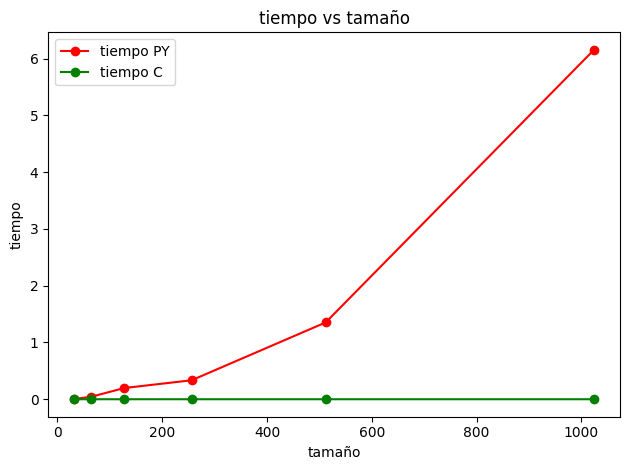

In [19]:
import matplotlib.pyplot as plt

plt.plot(Ns, tpy, 'r-o', label='tiempo PY')
plt.plot(Ns, tc, 'g-o', label='tiempo C')
#plt.plot(Ns, tasm, 'y-o', label='tiempo ASM')
plt.title('tiempo vs tamaño')
plt.xlabel('tamaño')
plt.ylabel('tiempo')
plt.legend()
plt.tight_layout()

13. Presentar una gráfica de tiempo de ejecución para cada tamaño con los mediciones realizadas a las funciones `c_cont_parej_cuad_perf` y `asm_cont_parej_cuad_perf`.

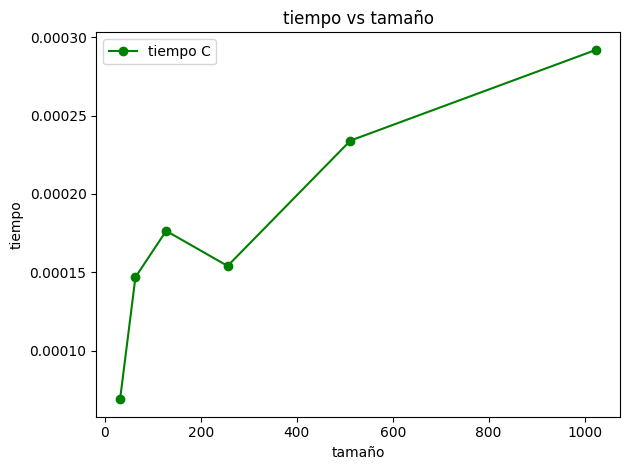

In [20]:
plt.plot(Ns, tc, 'g-o', label='tiempo C')
#plt.plot(Ns, tasm, 'y-o', label='tiempo ASM')
plt.title('tiempo vs tamaño')
plt.xlabel('tamaño')
plt.ylabel('tiempo')
plt.legend()
plt.tight_layout()

14. Presentar una gráfica de speedup para cada tamaño a partir de las mediciones realizadas a las funciones. Considere la función `py_cont_parej_cuad_perf` como referencia.

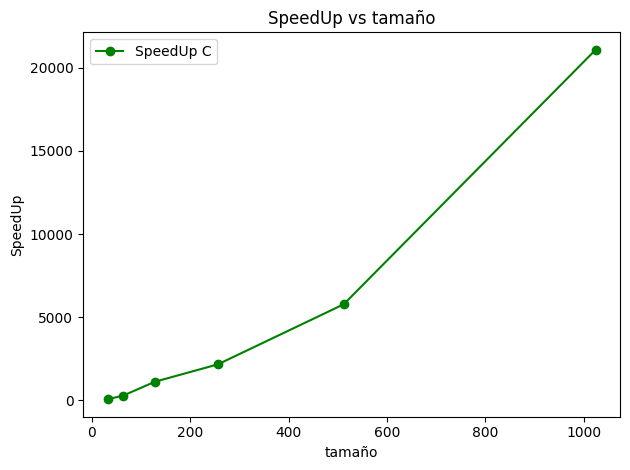

In [21]:
plt.plot(Ns, np.asarray(tpy)/np.asarray(tc), 'g-o', label='SpeedUp C' )
#plt.plot(Ns, np.asarray(tpy)/np.asarray(tasm), 'y-o', label='SpeedUp ASM' )
plt.title('SpeedUp vs tamaño')
plt.xlabel('tamaño')
plt.ylabel('SpeedUp')
plt.legend()
plt.tight_layout()

## Distribución de puntaje

| ítem | puntos |
|:----:|:------:|
|   1  |   2.0  |
|   2  |   3.0  |
|   3  |   0.5  |
|   4  |   5.0  |
|   5  |   0.5  |
|   6  |   2.0  |
|   7  |   0.5  |
|   8  |   0.5  |
|   9  |   0.5  |
|  10  |   1.0  |
|  11  |   3.0  |
|  12  |   0.5  |
|  13  |   0.5  |
|  14  |   0.5  |